# We can convert the 6d to 7D to be more similar to Lockwood et al. 2022

In [67]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import os
ex_path = "/Users/simon/new-orleans/data/kate_h08"
os.listdir(ex_path)

['minpr.63.nc',
 'fort.224.nc',
 'maxwvel.63.nc',
 'windDrag.173.nc',
 'fort.221.nc',
 'fort.73.nc',
 'fort.63.nc',
 'fort.22',
 'fort.14',
 'maxvel.63.nc',
 'fort.15',
 'fort.218',
 'fort.221',
 'fort.217',
 'fort.218.nc',
 'adcirc_log.txt',
 'maxele.63.nc',
 'fort.33',
 'fort.74.nc',
 'fort.64.nc',
 'fort.16',
 'fort.222.nc',
 'fort.217.nc',
 'fort.223.nc',
 'fort.224',
 'fort.223',
 'big_ds.nc',
 'traj.nc',
 'fort.222']

In [69]:
file_names = ['fort.73.nc', 'fort.74.nc', 'fort.63.nc', 'fort.64.nc']
variables = [('pressure',), ('windx', 'windy'), ('zeta',), ('u-vel', 'v-vel')]

In [70]:
import netCDF4 as nc

In [71]:
for i in range(len(file_names)):
    print([x for x in nc.Dataset(os.path.join(ex_path, file_names[i])).variables])

['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'pressure']
['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'windx', 'windy']
['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'zeta']
['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'u-vel', 'v-vel']


In [72]:
for i in range(len(file_names)):
    for variable in variables[i]:
        print(variable)
        print(nc.Dataset(os.path.join(ex_path, file_names[i]))[variable].long_name)

pressure
air pressure at sea level
windx
e/w wind velocity
windy
n/s wind velocity
zeta
water surface elevation above geoid
u-vel
water column vertically averaged east/west velocity
v-vel
water column vertically averaged north/south velocity


In [73]:
ds = nc.Dataset(os.path.join(ex_path, file_names[0]))

In [74]:
ds["pressure"].long_name

'air pressure at sea level'

In [75]:
ds["time"].long_name

'model time'

In [76]:
ds["time"].units

'seconds since 2020-04-28 00:00:00'

In [77]:
ds["time"][:]

masked_array(data=[   4800.,    9600.,   14400.,   19200.,   24000.,
                     28800.,   33600.,   38400.,   43200.,   48000.,
                     52800.,   57600.,   62400.,   67200.,   72000.,
                     76800.,   81600.,   86400.,   91200.,   96000.,
                    100800.,  105600.,  110400.,  115200.,  120000.,
                    124800.,  129600.,  134400.,  139200.,  144000.,
                    148800.,  153600.,  158400.,  163200.,  168000.,
                    172800.,  177600.,  182400.,  187200.,  192000.,
                    196800.,  201600.,  206400.,  211200.,  216000.,
                    220800.,  225600.,  230400.,  235200.,  240000.,
                    244800.,  249600.,  254400.,  259200.,  264000.,
                    268800.,  273600.,  278400.,  283200.,  288000.,
                    292800.,  297600.,  302400.,  307200.,  312000.,
                    316800.,  321600.,  326400.,  331200.,  336000.,
                    340800.,  3456

## Add all this weird nc data into a single xarray dataset.

In [78]:
import xarray as xr

In [79]:
traj_ds = xr.open_dataset(os.path.join(ex_path, "traj.nc"))

In [80]:
traj_ds

<xarray.Dataset>
Dimensions:  (time: 56)
Coordinates:
  * time     (time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Data variables:
    lon      (time) float64 ...
    lat      (time) float64 ...

### Mess around with ADCIRC mesh

ds["adcirc_mesh"]

In [81]:
# triangular mesh elements stored in "element" variable
ds["element"][:]

masked_array(
  data=[[5189, 5434, 5190],
        [7845, 7777, 7844],
        [4551, 4806, 4807],
        ...,
        [ 997, 1079, 1078],
        [ 996, 1078, 1077],
        [1079, 1168, 1078]],
  mask=False,
  fill_value=999999,
  dtype=int32)

In [82]:
ds["element"][:].shape

(14761, 3)

Dimension: element, vertex, Units: mesh component [dimensionless]

In [83]:
xr.DataArray(ds["element"][:], dims=["element", "vertex"])

<xarray.DataArray (element: 14761, vertex: 3)>
array([[5189, 5434, 5190],
       [7845, 7777, 7844],
       [4551, 4806, 4807],
       ...,
       [ 997, 1079, 1078],
       [ 996, 1078, 1077],
       [1079, 1168, 1078]], dtype=int32)
Dimensions without coordinates: element, vertex

In [84]:
ds["depth"][:]  # depth at nodes

masked_array(data=[1., 1., 1., ..., 1., 1., 1.],
             mask=False,
       fill_value=1e+20)

In [85]:
ds["depth"][:].max(), ds["depth"][:].min() # can only get down to 1 meter of depth

(7987.0644531, 1.0)

In [86]:
ds["depth"][:].shape

(8303,)

In [87]:
xr.DataArray(ds["depth"][:], dims=["node"])

<xarray.DataArray (node: 8303)>
array([1., 1., 1., ..., 1., 1., 1.])
Dimensions without coordinates: node

### Let's look at the main variables

In [88]:
ds["pressure"][:].shape  # pressure at nodes

(252, 8303)

In [89]:
xr.Dataset(data_vars=dict(pressure=(["time", "node"], ds["pressure"][:])))

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Dimensions without coordinates: time, node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33

In [90]:
ds_list = []
for i in range(len(file_names)):
    for variable in variables[i]:
        print(variable)
        ds_list.append(xr.Dataset(data_vars={
        variable: (["time", "node"], nc.Dataset(os.path.join(ex_path, file_names[i]))[variable][:]),
        }))

pressure
windx
windy
zeta
u-vel
v-vel


In [91]:
ds_list[0]

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Dimensions without coordinates: time, node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33

In [92]:
merge_ds = xr.merge(ds_list)

In [93]:
merge_ds

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Dimensions without coordinates: time, node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33
    windx     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    windy     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    zeta      (time, node) float64 3.793e-06 2.164e-05 ... -0.2057 -0.136
    u-vel     (time, node) float64 2.479e-05 2.382e-05 ... 0.06647 -0.001961
    v-vel     (time, node) float64 5.628e-06 1.081e-05 ... -0.01729 -0.00115

### How to convert from model time to datetime?

ds

In [94]:
traj_ds

<xarray.Dataset>
Dimensions:  (time: 56)
Coordinates:
  * time     (time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Data variables:
    lon      (time) float64 -88.97 -88.97 -88.97 -88.97 ... -88.97 -88.97 -88.97
    lat      (time) float64 2.945 3.695 4.446 5.196 ... 41.95 42.7 43.45 44.2

In [95]:
merge_ds["pressure"].shape

(252, 8303)

In [96]:
252/14

18.0

In [97]:
traj_ds

<xarray.Dataset>
Dimensions:  (time: 56)
Coordinates:
  * time     (time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Data variables:
    lon      (time) float64 -88.97 -88.97 -88.97 -88.97 ... -88.97 -88.97 -88.97
    lat      (time) float64 2.945 3.695 4.446 5.196 ... 41.95 42.7 43.45 44.2

In [98]:
31 - 25

6

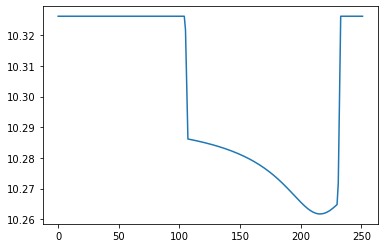

In [99]:
import matplotlib.pyplot as plt

plt.plot(merge_ds["pressure"].values[:, 25])

In [100]:
merge_ds["pressure"].values.shape

(252, 8303)

Text(0.5, 0, 'Time')

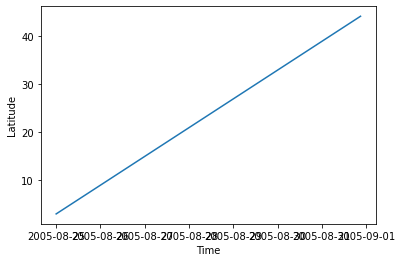

In [101]:
plt.plot(traj_ds["time"].values, traj_ds["lat"].values)
plt.ylabel("Latitude")
plt.xlabel("Time")

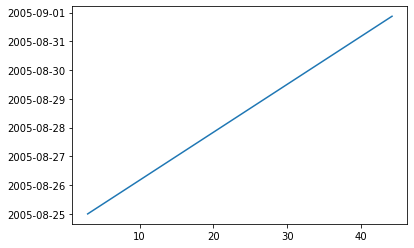

In [102]:
plt.plot(traj_ds["lat"].values, traj_ds["time"].values)


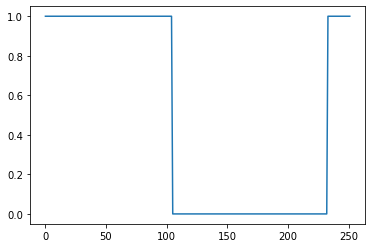

In [103]:
import numpy as np

bool_array = merge_ds["pressure"].values[:,3000] > 10.32619776 - 0.0001

plt.plot(bool_array)
change_array = np.diff(bool_array.astype(int))

In [104]:
np.where(change_array != 0)

(array([104, 232]),)

In [105]:
bool_array[105:233]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]

In [106]:
bool_array[105:233].shape

(128,)

In [107]:
traj_ds["time"].values.shape

(56,)

In [108]:
128 / 56

2.2857142857142856

In [109]:
traj_ds["time"].values

array(['2005-08-25T00:00:00.000000000', '2005-08-25T03:00:00.000000000',
       '2005-08-25T06:00:00.000000000', '2005-08-25T09:00:00.000000000',
       '2005-08-25T12:00:00.000000000', '2005-08-25T15:00:00.000000000',
       '2005-08-25T18:00:00.000000000', '2005-08-25T21:00:00.000000000',
       '2005-08-26T00:00:00.000000000', '2005-08-26T03:00:00.000000000',
       '2005-08-26T06:00:00.000000000', '2005-08-26T09:00:00.000000000',
       '2005-08-26T12:00:00.000000000', '2005-08-26T15:00:00.000000000',
       '2005-08-26T18:00:00.000000000', '2005-08-26T21:00:00.000000000',
       '2005-08-27T00:00:00.000000000', '2005-08-27T03:00:00.000000000',
       '2005-08-27T06:00:00.000000000', '2005-08-27T09:00:00.000000000',
       '2005-08-27T12:00:00.000000000', '2005-08-27T15:00:00.000000000',
       '2005-08-27T18:00:00.000000000', '2005-08-27T21:00:00.000000000',
       '2005-08-28T00:00:00.000000000', '2005-08-28T03:00:00.000000000',
       '2005-08-28T06:00:00.000000000', '2005-08-28

In [110]:
merge_ds["pressure"].values

array([[10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       ...,
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776]])

### summary of time differences
So the time for the input seems to be every three hours for 56 timesteps -- for 7 days of total time.
For the output this seems to correspond to [104, 232] - so 128 or so timesteps (possibly off by one error) so seems to be an 80 minute timestep - 1:20.

In [111]:
56*3 / 24

7.0

In [112]:
232-104

128

In [113]:
128/7

18.285714285714285

In [114]:
nc.Dataset(os.path.join(ex_path, file_names[0]))["time"].units

'seconds since 2020-04-28 00:00:00'

In [115]:
np.diff(nc.Dataset(os.path.join(ex_path, file_names[0]))["time"][:])

masked_array(data=[4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800.,

In [116]:
4800 / 60 

80.0

In [117]:
from datetime import datetime, timedelta
seconds_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["time"][:]
start_input = traj_ds["time"].values[0]
start_input_date = datetime.utcfromtimestamp(
            (start_input - np.datetime64("1970-01-01T00:00:00")) / np.timedelta64(1, "s")
        )
time_array = [start_input_date + timedelta(minutes= seconds_array[i]/60 - 105 * 80) for i in range(len(seconds_array))]

In [118]:
merge_ds.assign_coords(time=time_array)

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Coordinates:
  * time      (time) datetime64[ns] 2005-08-19T05:20:00 ... 2005-09-02T04:00:00
Dimensions without coordinates: node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33
    windx     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    windy     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    zeta      (time, node) float64 3.793e-06 2.164e-05 ... -0.2057 -0.136
    u-vel     (time, node) float64 2.479e-05 2.382e-05 ... 0.06647 -0.001961
    v-vel     (time, node) float64 5.628e-06 1.081e-05 ... -0.01729 -0.00115

In [119]:
start_input = traj_ds["time"].values[0]

In [120]:
xr.merge([traj_ds.rename({"time": "input_time"}), merge_ds.rename({"time": "output_time"})])

<xarray.Dataset>
Dimensions:     (input_time: 56, output_time: 252, node: 8303)
Coordinates:
  * input_time  (input_time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Dimensions without coordinates: output_time, node
Data variables:
    lon         (input_time) float64 -88.97 -88.97 -88.97 ... -88.97 -88.97
    lat         (input_time) float64 2.945 3.695 4.446 5.196 ... 42.7 43.45 44.2
    pressure    (output_time, node) float64 10.33 10.33 10.33 ... 10.33 10.33
    windx       (output_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    windy       (output_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    zeta        (output_time, node) float64 3.793e-06 2.164e-05 ... -0.136
    u-vel       (output_time, node) float64 2.479e-05 2.382e-05 ... -0.001961
    v-vel       (output_time, node) float64 5.628e-06 1.081e-05 ... -0.00115

In [121]:
start_input

numpy.datetime64('2005-08-25T00:00:00.000000000')

In [122]:
date = datetime.utcfromtimestamp(
            (start_input - np.datetime64("1970-01-01T00:00:00")) / np.timedelta64(1, "s")
        )

In [123]:
date

datetime.datetime(2005, 8, 25, 0, 0)

In [124]:
dir(start_input)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_interface__',
 '__array_priority__',
 '__array_struct__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__xor__',
 'all',
 'any',
 'argmax',
 'argmin',
 'argsort',
 'ast

### Depth and Mesh dataset

In [125]:
depth_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["depth"][:]
element_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["element"][:]

In [126]:
mesh_ds = xr.Dataset(data_vars=dict(depth=(["node"], depth_array), triangle=(["element", "vertex"], element_array)))

In [127]:
xr.DataArray(ds["element"][:], dims=["element", "vertex"])

<xarray.DataArray (element: 14761, vertex: 3)>
array([[5189, 5434, 5190],
       [7845, 7777, 7844],
       [4551, 4806, 4807],
       ...,
       [ 997, 1079, 1078],
       [ 996, 1078, 1077],
       [1079, 1168, 1078]], dtype=int32)
Dimensions without coordinates: element, vertex

In [128]:
ds["ibtype"].long_name

'type of normal flow (discharge) boundary'

In [129]:
ds["ibtype"].shape

(44,)

### Get Max values

In [130]:
file_names=["maxele.63.nc", 'maxwvel.63.nc', "maxvel.63.nc"]
variables=[("zeta_max", "time_of_zeta_max"), ("wind_max", "time_of_wind_max"), ("vel_max","time_of_vel_max")]
new_ds_list = []
for i in range(len(file_names)):
    for variable in variables[i]:
        new_ds_list.append(xr.Dataset(data_vars={
        variable: (["node"], nc.Dataset(os.path.join(ex_path, file_names[i]))[variable][:]),
        }))
max_ds = xr.merge(new_ds_list)

In [131]:
nc.Dataset(os.path.join(ex_path, "maxvel.63.nc"))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    _FillValue: -99999.0
    model: ADCIRC
    version: 454104d
    grid_type: Triangular
    description: OceanMesh2D
    agrid: OceanMesh2D
    rundes: OceanMesh2D
    runid: Run_001
    title: OceanMesh2D
    institution: Notre Dame CHL
    source: OceanMesh2D
    history: History: None
    references: https://github.com/CHLNDDEV/OceanMesh2D/
    comments: Comments: None
    host: Host: Name
    convention: Metric, MSL
    Conventions: UGRID-0.9.0
    contact: name@instit.edu
    creation_date: 2023-02-07 22:14:14  00:00
    modification_date: 2023-02-07 22:14:14  00:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 20.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 0
    ncor: 1
    ntip: 1
    nws: 12
    nramp: 1
    tau0: -1.0
    statim: 0.0
    reftim: 0.0
    rnday: 14.0
    dramp: 2.0
    a00: 0.0
    b00: 1.0
    c00: 0.0
   

In [132]:
nc.Dataset(os.path.join(ex_path, "maxele.63.nc"))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    _FillValue: -99999.0
    model: ADCIRC
    version: 454104d
    grid_type: Triangular
    description: OceanMesh2D
    agrid: OceanMesh2D
    rundes: OceanMesh2D
    runid: Run_001
    title: OceanMesh2D
    institution: Notre Dame CHL
    source: OceanMesh2D
    history: History: None
    references: https://github.com/CHLNDDEV/OceanMesh2D/
    comments: Comments: None
    host: Host: Name
    convention: Metric, MSL
    Conventions: UGRID-0.9.0
    contact: name@instit.edu
    creation_date: 2023-02-07 22:14:13  00:00
    modification_date: 2023-02-07 22:14:13  00:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 20.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 0
    ncor: 1
    ntip: 1
    nws: 12
    nramp: 1
    tau0: -1.0
    statim: 0.0
    reftim: 0.0
    rnday: 14.0
    dramp: 2.0
    a00: 0.0
    b00: 1.0
    c00: 0.0
   

In [133]:
os.listdir(ex_path)

['minpr.63.nc',
 'fort.224.nc',
 'maxwvel.63.nc',
 'windDrag.173.nc',
 'fort.221.nc',
 'fort.73.nc',
 'fort.63.nc',
 'fort.22',
 'fort.14',
 'maxvel.63.nc',
 'fort.15',
 'fort.218',
 'fort.221',
 'fort.217',
 'fort.218.nc',
 'adcirc_log.txt',
 'maxele.63.nc',
 'fort.33',
 'fort.74.nc',
 'fort.64.nc',
 'fort.16',
 'fort.222.nc',
 'fort.217.nc',
 'fort.223.nc',
 'fort.224',
 'fort.223',
 'big_ds.nc',
 'traj.nc',
 'fort.222']

### Merge all together

In [134]:
xr.merge([traj_ds.rename({"time": "input_time"}), merge_ds.rename({"time": "output_time"}), mesh_ds])

<xarray.Dataset>
Dimensions:     (input_time: 56, output_time: 252, node: 8303, element: 14761,
                 vertex: 3)
Coordinates:
  * input_time  (input_time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Dimensions without coordinates: output_time, node, element, vertex
Data variables:
    lon         (input_time) float64 -88.97 -88.97 -88.97 ... -88.97 -88.97
    lat         (input_time) float64 2.945 3.695 4.446 5.196 ... 42.7 43.45 44.2
    pressure    (output_time, node) float64 10.33 10.33 10.33 ... 10.33 10.33
    windx       (output_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    windy       (output_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    zeta        (output_time, node) float64 3.793e-06 2.164e-05 ... -0.136
    u-vel       (output_time, node) float64 2.479e-05 2.382e-05 ... -0.001961
    v-vel       (output_time, node) float64 5.628e-06 1.081e-05 ... -0.00115
    depth       (node) float64 1.0 1.0 1.0 3.835 1.0 ... 17.61 14.61 1.0 1.0 1.0
    triangle    (element, vertex) int32 5189 5434 5190 7845 ... 1079 1168 1078

In [153]:
def get_data(ex_path: str) -> xr.Dataset:
    file_names = ['fort.73.nc', 'fort.74.nc', 'fort.63.nc', 'fort.64.nc']
    variables = [('pressure',), ('windx', 'windy'), ('zeta',), ('u-vel', 'v-vel')]
    ds_list = []
    for i in range(len(file_names)):
        for variable in variables[i]:
            ds_list.append(xr.Dataset(data_vars={
            variable: (["time", "node"], nc.Dataset(os.path.join(ex_path, file_names[i]))[variable][:]),
            }))
    merge_ds = xr.merge(ds_list)
    seconds_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["time"][:]
    start_input = traj_ds["time"].values[0]
    start_input_date = datetime.utcfromtimestamp(
                (start_input - np.datetime64("1970-01-01T00:00:00")) / np.timedelta64(1, "s")
            )
    time_array = [start_input_date + timedelta(minutes= seconds_array[i]/60 - 105 * 80) for i in range(len(seconds_array))]
    merge_ds = merge_ds.assign_coords(time=time_array)
    print(merge_ds)
    x_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["x"][:]
    y_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["y"][:]
    depth_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["depth"][:]
    element_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["element"][:]
    mesh_ds = xr.Dataset(data_vars=dict(depth=(["node"], depth_array), triangle=(["element", "vertex"], element_array), x=(["node"], x_array), y=(["node"], y_array)))
    file_names=["maxele.63.nc", 'maxwvel.63.nc', "maxvel.63.nc", "minpr.63.nc"]
    variables=[("zeta_max", "time_of_zeta_max"), 
               ("wind_max", "time_of_wind_max"), 
               ("vel_max", "time_of_vel_max"), 
               ("pressure_min", "time_of_pressure_min")]
    new_ds_list = []
    for i in range(len(file_names)):
        for variable in variables[i]:
            new_ds_list.append(xr.Dataset(data_vars={
            variable: (["node"], nc.Dataset(os.path.join(ex_path, file_names[i]))[variable][:]),
            }))
    max_ds = xr.merge(new_ds_list)
    return xr.merge([traj_ds.rename({"time": "input_time", "lon": "clon", "lat": "clat"}),
                     merge_ds.rename({"time": "output_time"}), 
                     mesh_ds.rename({"x": "lon", "y": "lat"}),
                     max_ds])

In [154]:
combined_ds = get_data(ex_path)

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Coordinates:
  * time      (time) datetime64[ns] 2005-08-19T05:20:00 ... 2005-09-02T04:00:00
Dimensions without coordinates: node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33
    windx     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    windy     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    zeta      (time, node) float64 3.793e-06 2.164e-05 ... -0.2057 -0.136
    u-vel     (time, node) float64 2.479e-05 2.382e-05 ... 0.06647 -0.001961
    v-vel     (time, node) float64 5.628e-06 1.081e-05 ... -0.01729 -0.00115


In [155]:
combined_ds

<xarray.Dataset>
Dimensions:               (input_time: 56, output_time: 252, node: 8303,
                           element: 14761, vertex: 3)
Coordinates:
  * input_time            (input_time) datetime64[ns] 2005-08-25 ... 2005-08-...
  * output_time           (output_time) datetime64[ns] 2005-08-19T05:20:00 .....
Dimensions without coordinates: node, element, vertex
Data variables: (12/20)
    clon                  (input_time) float64 -88.97 -88.97 ... -88.97 -88.97
    clat                  (input_time) float64 2.945 3.695 4.446 ... 43.45 44.2
    pressure              (output_time, node) float64 10.33 10.33 ... 10.33
    windx                 (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0
    windy                 (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0
    zeta                  (output_time, node) float64 3.793e-06 ... -0.136
    ...                    ...
    wind_max              (node) float64 4.659 4.598 0.0 4.649 ... 0.0 0.0 0.0
    time_of_wind_max      (node) float64 1.048e+06 1.048e+06 nan ... nan nan nan
    vel_max               (node) float64 0.1289 0.1069 0.5621 ... 0.1707 0.1136
    time_of_vel_max       (node) float64 2.183e+05 1.044e+06 ... 8.982e+05
    pressure_min          (node) float64 10.26 10.26 10.33 ... 10.33 10.33 10.33
    time_of_pressure_min  (node) float64 1.048e+06 1.048e+06 20.0 ... 20.0 20.0

In [138]:
combined_ds.to_netcdf(os.path.join(ex_path, "big_ds.nc"), engine="netcdf4")

In [139]:
combined_ds

<xarray.Dataset>
Dimensions:           (input_time: 56, output_time: 252, node: 8303,
                       element: 14761, vertex: 3)
Coordinates:
  * input_time        (input_time) datetime64[ns] 2005-08-25 ... 2005-08-31T2...
Dimensions without coordinates: output_time, node, element, vertex
Data variables: (12/18)
    clon              (input_time) float64 -88.97 -88.97 ... -88.97 -88.97
    clat              (input_time) float64 2.945 3.695 4.446 ... 42.7 43.45 44.2
    pressure          (output_time, node) float64 10.33 10.33 ... 10.33 10.33
    windx             (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    windy             (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    zeta              (output_time, node) float64 3.793e-06 2.164e-05 ... -0.136
    ...                ...
    zeta_max          (node) float64 0.3129 0.3041 4.42 ... 0.2697 0.3773 0.323
    time_of_zeta_max  (node) float64 1.079e+06 1.079e+06 ... 6.911e+05 6.91e+05
    wind_max          (node) float64 4.659 4.598 0.0 4.649 ... 0.0 0.0 0.0 0.0
    time_of_wind_max  (node) float64 1.048e+06 1.048e+06 nan ... nan nan nan
    vel_max           (node) float64 0.1289 0.1069 0.5621 ... 0.1707 0.1136
    time_of_vel_max   (node) float64 2.183e+05 1.044e+06 ... 1.159e+06 8.982e+05

In [141]:
os.listdir(ex_path)

['minpr.63.nc',
 'fort.224.nc',
 'maxwvel.63.nc',
 'windDrag.173.nc',
 'fort.221.nc',
 'fort.73.nc',
 'fort.63.nc',
 'fort.22',
 'fort.14',
 'maxvel.63.nc',
 'fort.15',
 'fort.218',
 'fort.221',
 'fort.217',
 'fort.218.nc',
 'adcirc_log.txt',
 'maxele.63.nc',
 'fort.33',
 'fort.74.nc',
 'fort.64.nc',
 'fort.16',
 'fort.222.nc',
 'fort.217.nc',
 'fort.223.nc',
 'fort.224',
 'fort.223',
 'big_ds.nc',
 'traj.nc',
 'fort.222']

In [142]:
ls -lash . 

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
total 91816
    0 drwxr-xr-x  49 simon  staff   1.5K Feb 10 19:34 ./
    0 drwxr-xr-x   7 simon  staff   224B Feb  4 12:26 ../
   16 -rw-r--r--@  1 simon  staff   6.0K Nov  3 09:08 .DS_Store
    0 -rw-r--r--   1 simon  staff     0B May 23  2022 .gitkeep
    0 drwxr-xr-x  35 simon  staff   1.1K Feb 10 19:34 .ipynb_checkpoints/
28752 -rw-r--r--   1 simon  staff    14M Jan 29 14:17 2-dimensional-emulation.ipynb
   72 -rw-r--r--   1 simon  staff    35K Nov 24 16:16 6D-Emulation-Fake-and-Real.ipynb
  872 -rw-r--r--   1 simon  staff   434K Feb 10 19:53 7D_Conversion.ipynb
 3520 -rw-r--r--   1 simon  staff   1.7M Feb  2 21:26 ERA5.ipynb
  224 -rw-r--r--   1 simon  staff   109K Nov  3 15:24 Fort63.ipynb
   48 -rw-r--r--   1 simon  staff    22K Nov 24 18:47 Gpy_testing.ipynb
  608 -rw-r--r--   1 simon  staff   303K Nov  5 17:31 Holland08.ipynb
 1072 -rw-r

In [143]:
ex_path

'/Users/simon/new-orleans/data/kate_h08'

In [144]:
ls -lash '/Users/simon/new-orleans/data/kate_h08'

total 419120
     0 drwxr-xr-x  31 simon  staff   992B Feb 10 18:13 ./
     0 drwxr-xr-x  96 simon  staff   3.0K Feb  4 20:07 ../
    88 -rw-r--r--   1 simon  staff    43K Feb  7 22:14 adcirc_log.txt
197712 -rw-r--r--   1 simon  staff    97M Feb 10 19:35 big_ds.nc
  1744 -rw-r--r--   1 simon  staff   870K Feb  7 22:06 fort.14
    40 -rw-r--r--   1 simon  staff    18K Feb  7 22:06 fort.15
  3920 -rw-r--r--   1 simon  staff   1.9M Feb  7 22:14 fort.16
  3072 -rw-r--r--   1 simon  staff   1.5M Feb  7 22:06 fort.217
  2440 -rw-r--r--   1 simon  staff   1.2M Feb  7 22:06 fort.217.nc
  6128 -rw-r--r--   1 simon  staff   3.0M Feb  7 22:06 fort.218
  4856 -rw-r--r--   1 simon  staff   2.4M Feb  7 22:06 fort.218.nc
     8 -rw-r--r--   1 simon  staff    10B Feb  7 22:06 fort.22
 11088 -rw-r--r--   1 simon  staff   5.4M Feb  7 22:08 fort.221
  8776 -rw-r--r--@  1 simon  staff   4.3M Feb  7 22:08 fort.221.nc
 22160 -rw-r--r--   1 simon  staff    11M Feb  7 22:08 fort.222
 17520 -rw-r--r--@  1 simo

In [145]:
nc.Dataset(os.path.join(ex_path, "minpr.63.ncs"))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    _FillValue: -99999.0
    model: ADCIRC
    version: 454104d
    grid_type: Triangular
    description: OceanMesh2D
    agrid: OceanMesh2D
    rundes: OceanMesh2D
    runid: Run_001
    title: OceanMesh2D
    institution: Notre Dame CHL
    source: OceanMesh2D
    history: History: None
    references: https://github.com/CHLNDDEV/OceanMesh2D/
    comments: Comments: None
    host: Host: Name
    convention: Metric, MSL
    Conventions: UGRID-0.9.0
    contact: name@instit.edu
    creation_date: 2023-02-07 22:14:14  00:00
    modification_date: 2023-02-07 22:14:14  00:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 20.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 0
    ncor: 1
    ntip: 1
    nws: 12
    nramp: 1
    tau0: -1.0
    statim: 0.0
    reftim: 0.0
    rnday: 14.0
    dramp: 2.0
    a00: 0.0
    b00: 1.0
    c00: 0.0
   